# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [81]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [82]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

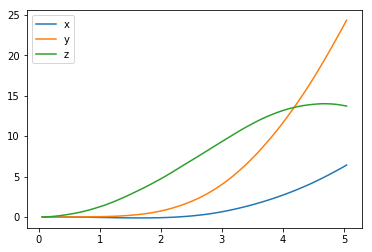

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

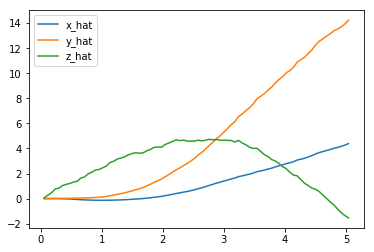

In [84]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

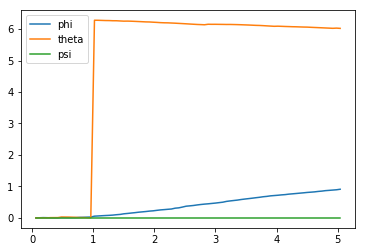

In [85]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

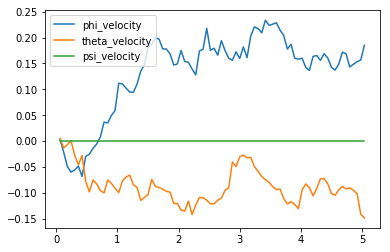

In [86]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

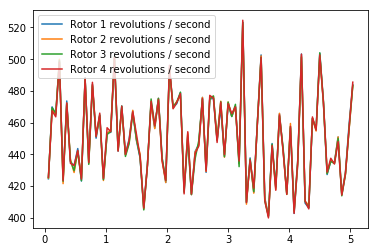

In [87]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [88]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 6.41604644 24.32982944 13.71437074  0.91107745  6.02244737  0.        ]
[ 4.38876173 14.23159602 -1.54447726]
[ 0.18522394 -0.148748    0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.788 (best =  -0.038), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [104]:
## TODO: Train your agent here.
import sys
import pandas as pd
import numpy as np
from agents.ddpg import DDPG
from agents.actor import Actor
from task import Task

num_episodes = 2000
target_pos = np.array([0., 0., 10.])
init_pose = np.array([0., 0., 0., 0., 0., 0.])

task = Task(init_pose = init_pose, target_pos=target_pos)
agent = DDPG(task)
total_reward = 0
best_episode_reward = -float("inf")
labels = ['eps','cum_sum']
results = {x:[] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    best_episode_reward = -float("inf")
    total_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action,reward,next_state,done)
        state = next_state
        total_reward += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            print("\rEpisode = {:4d} Reward = {:4f} Cum Reward = {:4f} \n".format(i_episode, best_episode_reward,total_reward),task.getPose(), "\n", end=" ")
            break
    results['eps'].append(i_episode)
    results['cum_sum'].append(total_reward)

    sys.stdout.flush()

Episode =    1 Reward = 6.816154 Cum Reward = 68.155535 
 [ 0.11624677 -0.07023215  0.          4.70287997  4.84468061  0.        ] 
Episode =    2 Reward = 6.815740 Cum Reward = 34.077466 
 [-0.03491053  0.05203415  0.          5.97250169  1.18936484  0.        ] 
Episode =    3 Reward = 6.815697 Cum Reward = 20.446993 
 [-2.52341989e-04  1.01760737e-02  0.00000000e+00  1.66348517e+00
  9.77647231e-01  0.00000000e+00] 
Episode =    4 Reward = 6.815686 Cum Reward = 20.446904 
 [1.07786475e-02 5.83597537e-04 0.00000000e+00 2.25450934e+00
 5.40853390e+00 0.00000000e+00] 
Episode =    5 Reward = 6.817059 Cum Reward = 163.476887 
 [-1.16276495  1.07006057  0.          1.68342507  2.75540906  0.        ] 
Episode =    6 Reward = 6.815687 Cum Reward = 20.446988 
 [-5.09280546e-03  1.54848714e-03  0.00000000e+00  2.17353041e-01
  5.20140067e+00  0.00000000e+00] 
Episode =    7 Reward = 6.815740 Cum Reward = 34.078162 
 [0.0277281  0.01086395 0.         5.30521457 5.33847214 0.        ] 
Episo

Episode =   55 Reward = 6.815637 Cum Reward = 6.815637 
 [ 8.32005842e-03 -1.87098815e-04  0.00000000e+00  3.10502969e-01
  2.37123656e+00  0.00000000e+00] 
Episode =   56 Reward = 6.815638 Cum Reward = 6.815638 
 [8.45100941e-03 3.64624732e-05 0.00000000e+00 3.92639674e-01
 2.83204840e+00 0.00000000e+00] 
Episode =   57 Reward = 6.815640 Cum Reward = 6.815640 
 [7.86466380e-03 6.32635472e-04 0.00000000e+00 4.49819329e-01
 3.62028027e+00 0.00000000e+00] 
Episode =   58 Reward = 6.815646 Cum Reward = 13.630893 
 [5.78745201e-02 1.46951968e-03 0.00000000e+00 9.19262338e-01
 5.20488002e+00 0.00000000e+00] 
Episode =   59 Reward = 6.815668 Cum Reward = 20.445363 
 [0.03983989 0.12261459 0.         2.34544033 0.39848379 0.        ] 
Episode =   60 Reward = 6.815637 Cum Reward = 13.630914 
 [-4.76972775e-02 -3.53180740e-03  0.00000000e+00  1.02731671e+00
  3.71826030e+00  0.00000000e+00] 
Episode =   61 Reward = 6.815635 Cum Reward = 6.815635 
 [-8.46390214e-03 -5.11910834e-04  0.00000000e+0

Episode =  110 Reward = 6.815620 Cum Reward = 6.815620 
 [-0.00817493 -0.00396795  0.          0.07928795  1.51922803  0.        ] 
Episode =  111 Reward = 6.815625 Cum Reward = 6.815625 
 [-8.69658126e-03 -2.60132773e-03  0.00000000e+00  6.96233029e-01
  2.72679298e+00  0.00000000e+00] 
Episode =  112 Reward = 6.815640 Cum Reward = 6.815640 
 [-7.24801102e-03 -2.44876496e-04  0.00000000e+00  7.76388233e-01
  3.80378244e+00  0.00000000e+00] 
Episode =  113 Reward = 6.815637 Cum Reward = 6.815637 
 [-4.56779044e-03  3.18329256e-03  0.00000000e+00  1.10694274e+00
  4.98304485e+00  0.00000000e+00] 
Episode =  114 Reward = 6.815638 Cum Reward = 6.815638 
 [-9.69751263e-04  6.46493500e-03  0.00000000e+00  1.56468080e+00
  4.10819754e-01  0.00000000e+00] 
Episode =  115 Reward = 6.815642 Cum Reward = 6.815642 
 [1.24707889e-04 6.75652320e-03 0.00000000e+00 1.76111950e+00
 1.20717365e+00 0.00000000e+00] 
Episode =  116 Reward = 6.815639 Cum Reward = 6.815639 
 [1.25260214e-03 6.24772146e-03 0

Episode =  165 Reward = 6.815634 Cum Reward = 6.815634 
 [-3.17615744e-03  5.34749184e-03  0.00000000e+00  3.15147675e+00
  4.16892960e+00  0.00000000e+00] 
Episode =  166 Reward = 6.815646 Cum Reward = 6.815646 
 [-3.94995420e-04  5.38873956e-03  0.00000000e+00  2.90333555e+00
  5.36630552e+00  0.00000000e+00] 
Episode =  167 Reward = 6.815644 Cum Reward = 6.815644 
 [-6.74894613e-04  5.60441834e-03  0.00000000e+00  2.74578521e+00
  5.22477161e+00  0.00000000e+00] 
Episode =  168 Reward = 6.815642 Cum Reward = 6.815642 
 [1.72178606e-03 5.42360327e-03 0.00000000e+00 2.36273141e+00
 6.32095190e-01 0.00000000e+00] 
Episode =  169 Reward = 6.815638 Cum Reward = 6.815638 
 [0.00242318 0.0050999  0.         2.17603365 1.6005179  0.        ] 
Episode =  170 Reward = 6.815637 Cum Reward = 6.815637 
 [0.00261272 0.00502946 0.         2.06662822 1.89225535 0.        ] 
Episode =  171 Reward = 6.815637 Cum Reward = 6.815637 
 [0.00328632 0.00433072 0.         1.65538879 2.79954908 0.        ] 


Episode =  220 Reward = 6.815669 Cum Reward = 6.815669 
 [-9.49628782e-04  4.39855817e-04  0.00000000e+00  2.49372311e+00
  2.60884061e+00  0.00000000e+00] 
Episode =  221 Reward = 6.815643 Cum Reward = 6.815643 
 [-7.04724601e-03  2.46869378e-04  0.00000000e+00  2.47825012e+00
  4.43541546e+00  0.00000000e+00] 
Episode =  222 Reward = 6.815639 Cum Reward = 6.815639 
 [-7.81792184e-03  3.11474519e-04  0.00000000e+00  2.44893725e+00
  4.78947906e+00  0.00000000e+00] 
Episode =  223 Reward = 6.815634 Cum Reward = 6.815634 
 [-8.61629663e-03  7.76471344e-04  0.00000000e+00  2.16314821e+00
  1.23598387e-01  0.00000000e+00] 
Episode =  224 Reward = 6.815633 Cum Reward = 6.815633 
 [-8.76849993e-03  8.12757924e-04  0.00000000e+00  2.09312097e+00
  6.19163490e+00  0.00000000e+00] 
Episode =  225 Reward = 6.815637 Cum Reward = 6.815637 
 [-7.77155378e-03  8.07887706e-04  0.00000000e+00  2.00084707e+00
  7.13178945e-01  0.00000000e+00] 
Episode =  226 Reward = 6.815640 Cum Reward = 6.815640 
 [

Episode =  275 Reward = 6.815647 Cum Reward = 6.815647 
 [4.69416057e-03 1.05513455e-03 0.00000000e+00 4.68566397e+00
 1.95579444e+00 0.00000000e+00] 
Episode =  276 Reward = 6.815645 Cum Reward = 6.815645 
 [4.78941397e-03 1.39668594e-03 0.00000000e+00 4.55884330e+00
 2.16420886e+00 0.00000000e+00] 
Episode =  277 Reward = 6.815639 Cum Reward = 6.815639 
 [5.01673633e-03 2.37535983e-03 0.00000000e+00 4.49261675e+00
 2.67656326e+00 0.00000000e+00] 
Episode =  278 Reward = 6.815629 Cum Reward = 6.815629 
 [4.03389665e-03 6.08428242e-03 0.00000000e+00 4.34851368e+00
 5.14366020e+00 0.00000000e+00] 
Episode =  279 Reward = 6.815633 Cum Reward = 6.815633 
 [3.15911424e-03 6.40977814e-03 0.00000000e+00 4.21708984e+00
 5.59947401e+00 0.00000000e+00] 
Episode =  280 Reward = 6.815639 Cum Reward = 6.815639 
 [-7.33101520e-04  6.76508184e-03  0.00000000e+00  4.12563088e+00
  6.88344556e-01  0.00000000e+00] 
Episode =  281 Reward = 6.815636 Cum Reward = 6.815636 
 [-1.66945968e-03  6.63219824e-0

Episode =  329 Reward = 6.815631 Cum Reward = 6.815631 
 [-8.41584741e-03  1.63620073e-03  0.00000000e+00  2.54783058e+00
  2.27722934e+00  0.00000000e+00] 
Episode =  330 Reward = 6.815630 Cum Reward = 6.815630 
 [-8.24952227e-03  2.09397481e-03  0.00000000e+00  2.56722807e+00
  2.12552357e+00  0.00000000e+00] 
Episode =  331 Reward = 6.815634 Cum Reward = 6.815634 
 [-8.65820128e-03 -5.59788895e-04  0.00000000e+00  2.64799597e+00
  2.97174742e+00  0.00000000e+00] 
Episode =  332 Reward = 6.815625 Cum Reward = 6.815625 
 [-0.0065343  -0.00464441  0.          2.63231014  4.40663217  0.        ] 
Episode =  333 Reward = 6.815626 Cum Reward = 6.815626 
 [-7.51136339e-03 -3.57068608e-03  0.00000000e+00  2.64256417e+00
  3.97029040e+00  0.00000000e+00] 
Episode =  334 Reward = 6.815625 Cum Reward = 6.815625 
 [-0.00700148 -0.00422349  0.          2.73174824  4.21007752  0.        ] 
Episode =  335 Reward = 6.815633 Cum Reward = 6.815633 
 [-2.95236007e-03 -6.38148001e-03  0.00000000e+00  2

Episode =  385 Reward = 6.815636 Cum Reward = 6.815636 
 [2.15981711e-03 6.74426401e-03 0.00000000e+00 4.86306236e+00
 2.75458779e+00 0.00000000e+00] 
Episode =  386 Reward = 6.815631 Cum Reward = 6.815631 
 [2.95515582e-03 6.82768372e-03 0.00000000e+00 5.05800066e+00
 2.15932397e+00 0.00000000e+00] 
Episode =  387 Reward = 6.815637 Cum Reward = 6.815637 
 [1.87577435e-03 6.79640085e-03 0.00000000e+00 5.10710311e+00
 2.92392442e+00 0.00000000e+00] 
Episode =  388 Reward = 6.815639 Cum Reward = 6.815639 
 [1.23249348e-03 6.58055796e-03 0.00000000e+00 5.22999730e+00
 3.25773517e+00 0.00000000e+00] 
Episode =  389 Reward = 6.815642 Cum Reward = 6.815642 
 [-1.86584548e-03  4.74410485e-03  0.00000000e+00  5.45677956e+00
  4.46282905e+00  0.00000000e+00] 
Episode =  390 Reward = 6.815644 Cum Reward = 6.815644 
 [-7.67137126e-04  5.35483069e-03  0.00000000e+00  5.50052228e+00
  4.07760159e+00  0.00000000e+00] 
Episode =  391 Reward = 6.815639 Cum Reward = 6.815639 
 [-4.93990841e-03  2.34775

Episode =  440 Reward = 6.815635 Cum Reward = 6.815635 
 [ 0.00550989 -0.00346535  0.          1.60733677  0.53689611  0.        ] 
Episode =  441 Reward = 6.815628 Cum Reward = 6.815628 
 [ 0.00608347 -0.00403014  0.          2.59599739  0.91602341  0.        ] 
Episode =  442 Reward = 6.815624 Cum Reward = 6.815624 
 [ 0.00663409 -0.00428387  0.          3.97851851  1.74147611  0.        ] 
Episode =  443 Reward = 6.815617 Cum Reward = 6.815617 
 [ 0.00655881 -0.0062502   0.          5.14584976  1.43668558  0.        ] 
Episode =  444 Reward = 6.815624 Cum Reward = 6.815624 
 [ 6.46920848e-03 -4.88176235e-03  0.00000000e+00  8.54262565e-04
  2.49084433e+00  0.00000000e+00] 
Episode =  445 Reward = 6.815632 Cum Reward = 6.815632 
 [ 0.00618458 -0.00352333  0.          0.72818722  2.91797371  0.        ] 
Episode =  446 Reward = 6.815641 Cum Reward = 13.631084 
 [ 0.00385167 -0.02326853  0.          3.21287616  2.49653783  0.        ] 
Episode =  447 Reward = 6.815637 Cum Reward = 6.81

Episode =  497 Reward = 6.815639 Cum Reward = 6.815639 
 [ 7.26945618e-03 -1.15459768e-04  0.00000000e+00  2.99890721e+00
  2.01380427e+00  0.00000000e+00] 
Episode =  498 Reward = 6.815637 Cum Reward = 6.815637 
 [ 6.97639190e-03 -1.12546188e-03  0.00000000e+00  3.32859126e+00
  2.63624084e+00  0.00000000e+00] 
Episode =  499 Reward = 6.815639 Cum Reward = 6.815639 
 [ 6.37603404e-03 -1.28216216e-03  0.00000000e+00  3.82751944e+00
  3.32039699e+00  0.00000000e+00] 
Episode =  500 Reward = 6.815643 Cum Reward = 6.815643 
 [ 6.31606031e-03 -5.16281828e-04  0.00000000e+00  4.82242909e+00
  3.38886953e+00  0.00000000e+00] 
Episode =  501 Reward = 6.815640 Cum Reward = 6.815640 
 [ 7.03710648e-03 -5.68940292e-04  0.00000000e+00  5.15264645e+00
  2.57435697e+00  0.00000000e+00] 
Episode =  502 Reward = 6.815644 Cum Reward = 6.815644 
 [5.56651968e-03 9.86724200e-04 0.00000000e+00 6.08845656e+00
 4.16249315e+00 0.00000000e+00] 
Episode =  503 Reward = 6.815641 Cum Reward = 6.815641 
 [6.3396

Episode =  552 Reward = 6.815624 Cum Reward = 6.815624 
 [-1.00968022e-02 -1.47190392e-03  0.00000000e+00  5.38869111e+00
  3.12564680e+00  0.00000000e+00] 
Episode =  553 Reward = 6.815618 Cum Reward = 6.815618 
 [-1.06324508e-02 -2.22147617e-03  0.00000000e+00  4.40196059e+00
  2.85061358e+00  0.00000000e+00] 
Episode =  554 Reward = 6.815615 Cum Reward = 6.815615 
 [-0.00900575  0.00452124  0.          3.11212503  0.72540532  0.        ] 
Episode =  555 Reward = 6.815614 Cum Reward = 6.815614 
 [-0.00668611  0.00718343  0.          2.16292799  0.03352913  0.        ] 
Episode =  556 Reward = 6.815645 Cum Reward = 13.630955 
 [0.02277411 0.02334771 0.         4.51758071 0.914565   0.        ] 
Episode =  557 Reward = 6.815666 Cum Reward = 13.630975 
 [0.02446949 0.03025249 0.         4.48985628 2.8006672  0.        ] 
Episode =  558 Reward = 6.815637 Cum Reward = 6.815637 
 [ 0.00540367 -0.00242511  0.          1.5558619   0.35903992  0.        ] 
Episode =  559 Reward = 6.815641 Cum

Episode =  608 Reward = 6.815619 Cum Reward = 6.815619 
 [-9.65851228e-03  2.70399020e-03  0.00000000e+00  1.40955710e+00
  3.74915954e+00  0.00000000e+00] 
Episode =  609 Reward = 6.815620 Cum Reward = 6.815620 
 [-9.57424284e-03  2.47480212e-03  0.00000000e+00  1.10486220e+00
  3.78806228e+00  0.00000000e+00] 
Episode =  610 Reward = 6.815621 Cum Reward = 6.815621 
 [-8.34623126e-03  3.31813905e-03  0.00000000e+00  9.65925699e-01
  4.28405046e+00  0.00000000e+00] 
Episode =  611 Reward = 6.815624 Cum Reward = 6.815624 
 [-1.04662490e-02  9.52518120e-04  0.00000000e+00  7.72939339e-01
  3.15501822e+00  0.00000000e+00] 
Episode =  612 Reward = 6.815629 Cum Reward = 6.815629 
 [-6.25118131e-03  3.57907768e-03  0.00000000e+00  4.88061601e-01
  4.90890046e+00  0.00000000e+00] 
Episode =  613 Reward = 6.815628 Cum Reward = 6.815628 
 [-6.70297992e-03  3.25584174e-03  0.00000000e+00  4.30043088e-01
  4.78337044e+00  0.00000000e+00] 
Episode =  614 Reward = 6.815641 Cum Reward = 13.631205 
 

Episode =  664 Reward = 6.815616 Cum Reward = 6.815616 
 [ 0.00626065 -0.0066588   0.          5.0114119   1.98518801  0.        ] 
Episode =  665 Reward = 6.815623 Cum Reward = 6.815623 
 [ 4.02987920e-03 -7.66820772e-03  0.00000000e+00  4.97826151e+00
  6.51982232e-01  0.00000000e+00] 
Episode =  666 Reward = 6.815639 Cum Reward = 6.815639 
 [-7.02777355e-05 -7.37617645e-03  0.00000000e+00  4.85220023e+00
  5.71780690e+00  0.00000000e+00] 
Episode =  667 Reward = 6.815635 Cum Reward = 6.815635 
 [ 1.04764311e-03 -7.67826188e-03  0.00000000e+00  4.76469487e+00
  6.00867396e+00  0.00000000e+00] 
Episode =  668 Reward = 6.815627 Cum Reward = 6.815627 
 [-3.23884313e-03 -6.82305992e-03  0.00000000e+00  4.69847355e+00
  4.94419924e+00  0.00000000e+00] 
Episode =  669 Reward = 6.815618 Cum Reward = 6.815618 
 [-0.00730752 -0.0051228   0.          4.59929279  3.88189253  0.        ] 
Episode =  670 Reward = 6.815618 Cum Reward = 6.815618 
 [-9.77842147e-03 -2.84457083e-03  0.00000000e+00  4

Episode =  720 Reward = 6.815639 Cum Reward = 6.815639 
 [ 0.00457458 -0.00360041  0.          2.0963761   2.57034526  0.        ] 
Episode =  721 Reward = 6.815642 Cum Reward = 6.815642 
 [ 0.00246719 -0.00537046  0.          2.08153264  1.66276402  0.        ] 
Episode =  722 Reward = 6.815631 Cum Reward = 6.815631 
 [-0.00305983 -0.00675281  0.          2.05899028  0.14544563  0.        ] 
Episode =  723 Reward = 6.815633 Cum Reward = 6.815633 
 [-0.00248688 -0.00672252  0.          2.03843812  0.28833666  0.        ] 
Episode =  724 Reward = 6.815632 Cum Reward = 6.815632 
 [-0.00285634 -0.00663677  0.          1.99286439  0.19819274  0.        ] 
Episode =  725 Reward = 6.815618 Cum Reward = 6.815618 
 [-7.73221124e-03 -5.16288788e-03  0.00000000e+00  1.92286672e+00
  5.21326020e+00  0.00000000e+00] 
Episode =  726 Reward = 6.815619 Cum Reward = 6.815619 
 [-1.02325830e-02 -2.54635387e-03  0.00000000e+00  1.91820354e+00
  4.23773893e+00  0.00000000e+00] 
Episode =  727 Reward = 6.

Episode =  776 Reward = 6.815623 Cum Reward = 6.815623 
 [-1.08437294e-02 -1.04569670e-03  0.00000000e+00  6.62640422e-01
  5.46035715e+00  0.00000000e+00] 
Episode =  777 Reward = 6.815624 Cum Reward = 6.815624 
 [-1.10470123e-02 -8.47327729e-04  0.00000000e+00  6.36470052e-01
  5.33727339e+00  0.00000000e+00] 
Episode =  778 Reward = 6.815625 Cum Reward = 6.815625 
 [-1.14777482e-02 -1.30152080e-04  0.00000000e+00  6.15368145e-01
  4.82421718e+00  0.00000000e+00] 
Episode =  779 Reward = 6.815624 Cum Reward = 6.815624 
 [-1.09853704e-02 -8.86552757e-04  0.00000000e+00  6.06165276e-01
  5.39747798e+00  0.00000000e+00] 
Episode =  780 Reward = 6.815630 Cum Reward = 13.631012 
 [-3.07709931e-02 -4.13836307e-04  0.00000000e+00  1.13532545e+00
  4.19452853e+00  0.00000000e+00] 
Episode =  781 Reward = 6.815676 Cum Reward = 20.446439 
 [0.01276314 0.03737543 0.         2.57510347 1.41976779 0.        ] 
Episode =  782 Reward = 6.815650 Cum Reward = 13.630901 
 [0.05797426 0.00147335 0.    

Episode =  830 Reward = 6.815639 Cum Reward = 6.815639 
 [-8.04759265e-03 -6.53659830e-06  0.00000000e+00  2.06113879e-03
  2.12667287e+00  0.00000000e+00] 
Episode =  831 Reward = 6.815632 Cum Reward = 6.815632 
 [-9.70542884e-03 -1.27728511e-05  0.00000000e+00  4.55605651e-03
  1.63586896e+00  0.00000000e+00] 
Episode =  832 Reward = 6.815626 Cum Reward = 6.815626 
 [-1.14129182e-02 -1.07646324e-05  0.00000000e+00  6.01081644e-03
  9.69482279e-01  0.00000000e+00] 
Episode =  833 Reward = 6.815625 Cum Reward = 6.815625 
 [-1.18343296e-02 -9.03326993e-06  0.00000000e+00  6.88760147e-03
  7.19948821e-01  0.00000000e+00] 
Episode =  834 Reward = 6.815627 Cum Reward = 6.815627 
 [-1.10927687e-02 -1.99409919e-05  0.00000000e+00  9.47142541e-03
  1.13156026e+00  0.00000000e+00] 
Episode =  835 Reward = 6.815628 Cum Reward = 13.630914 
 [-4.24250581e-02  3.42935489e-03  0.00000000e+00  2.28065706e+00
  6.23163603e+00  0.00000000e+00] 
Episode =  836 Reward = 6.815636 Cum Reward = 13.631003 


Episode =  884 Reward = 6.815649 Cum Reward = 6.815649 
 [ 2.01477918e-03 -3.89836374e-03  0.00000000e+00  1.98286872e+00
  5.81830022e+00  0.00000000e+00] 
Episode =  885 Reward = 6.815644 Cum Reward = 6.815644 
 [ 0.00329708 -0.00305659  0.          2.11719262  0.41488967  0.        ] 
Episode =  886 Reward = 6.815645 Cum Reward = 6.815645 
 [ 0.00307735 -0.00333137  0.          2.1449434   0.22389906  0.        ] 
Episode =  887 Reward = 6.815641 Cum Reward = 6.815641 
 [ 0.00375204 -0.00290754  0.          2.22803365  0.86596091  0.        ] 
Episode =  888 Reward = 6.815638 Cum Reward = 6.815638 
 [ 0.00431083 -0.00281557  0.          2.33121329  1.52035408  0.        ] 
Episode =  889 Reward = 6.815634 Cum Reward = 6.815634 
 [ 0.00534131 -0.00290468  0.          2.39353607  2.5587438   0.        ] 
Episode =  890 Reward = 6.815632 Cum Reward = 6.815632 
 [ 6.16425215e-03 -3.02695147e-03  0.00000000e+00  2.50385430e+00
  3.16437021e+00  0.00000000e+00] 
Episode =  891 Reward = 6.

Episode =  941 Reward = 6.815617 Cum Reward = 6.815617 
 [ 2.09632271e-03 -1.19645069e-02  0.00000000e+00  4.39477904e+00
  9.67667671e-02  0.00000000e+00] 
Episode =  942 Reward = 6.815620 Cum Reward = 6.815620 
 [ 1.77551473e-03 -1.11717539e-02  0.00000000e+00  4.07057977e+00
  6.23335081e+00  0.00000000e+00] 
Episode =  943 Reward = 6.815623 Cum Reward = 6.815623 
 [ 1.64345562e-03 -1.04945528e-02  0.00000000e+00  3.80495165e+00
  6.17483169e+00  0.00000000e+00] 
Episode =  944 Reward = 6.815621 Cum Reward = 6.815621 
 [-1.09769832e-03 -1.05196082e-02  0.00000000e+00  3.60673550e+00
  5.26758847e+00  0.00000000e+00] 
Episode =  945 Reward = 6.815621 Cum Reward = 6.815621 
 [-1.64604567e-03 -9.95409894e-03  0.00000000e+00  3.23021403e+00
  5.12212686e+00  0.00000000e+00] 
Episode =  946 Reward = 6.815619 Cum Reward = 6.815619 
 [-2.35419410e-03 -9.69766582e-03  0.00000000e+00  3.01500486e+00
  4.94460549e+00  0.00000000e+00] 
Episode =  947 Reward = 6.815608 Cum Reward = 6.815608 
 [

Episode =  998 Reward = 6.815581 Cum Reward = 13.630684 
 [-0.03472362 -0.02837588  0.          1.17177281  4.30085993  0.        ] 
Episode =  999 Reward = 6.815591 Cum Reward = 13.630581 
 [-0.01937337 -0.05822299  0.          2.57042373  5.40805839  0.        ] 
Episode = 1000 Reward = 6.815634 Cum Reward = 20.445240 
 [ 0.02876623 -0.10376378  0.          3.43119509  3.67001146  0.        ] 
Episode = 1001 Reward = 6.815686 Cum Reward = 27.261418 
 [ 0.04457862 -0.03519617  0.          4.95273278  1.1572472   0.        ] 
Episode = 1002 Reward = 6.815631 Cum Reward = 20.445838 
 [0.07306187 0.00749445 0.         3.83132316 1.56876627 0.        ] 
Episode = 1003 Reward = 6.815616 Cum Reward = 20.445377 
 [ 0.10992879 -0.00994546  0.          3.83233909  5.63825863  0.        ] 
Episode = 1004 Reward = 6.815600 Cum Reward = 20.445501 
 [0.07899522 0.01126542 0.         3.45108451 1.26282064 0.        ] 
Episode = 1005 Reward = 6.815596 Cum Reward = 20.445457 
 [ 9.71221466e-02 -2.842

Episode = 1059 Reward = 6.815638 Cum Reward = 20.446554 
 [ 0.00389371 -0.039188    0.          3.55637791  1.95306431  0.        ] 
Episode = 1060 Reward = 6.815620 Cum Reward = 27.259559 
 [-0.08440566 -0.12665844  0.          5.02584418  1.24393366  0.        ] 
Episode = 1061 Reward = 6.815609 Cum Reward = 27.258429 
 [-0.1289839  -0.07715544  0.          2.62918539  1.44690127  0.        ] 
Episode = 1062 Reward = 6.815613 Cum Reward = 13.630422 
 [-0.08146342 -0.02434209  0.          2.37862328  4.08387932  0.        ] 
Episode = 1063 Reward = 6.815615 Cum Reward = 13.630439 
 [-0.08635769 -0.01831303  0.          4.62358654  3.64157838  0.        ] 
Episode = 1064 Reward = 6.815634 Cum Reward = 27.257386 
 [-0.21514146  0.04435604  0.          5.5377471   5.40401264  0.        ] 
Episode = 1065 Reward = 6.815685 Cum Reward = 47.694856 
 [-0.19584753 -0.27960676  0.          0.72446272  3.15063395  0.        ] 
Episode = 1066 Reward = 6.815584 Cum Reward = 13.630379 
 [ 0.0848571

Episode = 1120 Reward = 6.815588 Cum Reward = 13.630098 
 [-0.06146495  0.08704213  0.          4.38047879  5.53735119  0.        ] 
Episode = 1121 Reward = 6.815610 Cum Reward = 13.630469 
 [0.01415069 0.08985157 0.         3.86481228 4.02473514 0.        ] 
Episode = 1122 Reward = 6.815594 Cum Reward = 13.630529 
 [-0.01647161  0.06601015  0.          3.33094641  5.26698225  0.        ] 
Episode = 1123 Reward = 6.815576 Cum Reward = 13.630237 
 [-0.05176984  0.07289295  0.          2.53326273  4.14672481  0.        ] 
Episode = 1124 Reward = 6.815580 Cum Reward = 13.630359 
 [-0.03516525  0.07103193  0.          4.09806846  5.75873049  0.        ] 
Episode = 1125 Reward = 6.815563 Cum Reward = 13.630201 
 [-0.07592787  0.04866318  0.          3.04908438  4.80180815  0.        ] 
Episode = 1126 Reward = 6.815572 Cum Reward = 13.630411 
 [-0.05796384  0.04034856  0.          3.46299037  6.23782916  0.        ] 
Episode = 1127 Reward = 6.815586 Cum Reward = 13.630754 
 [-0.03242079  0.0

Episode = 1182 Reward = 6.815546 Cum Reward = 13.629986 
 [-0.11205684 -0.03644707  0.          4.76243963  3.94512577  0.        ] 
Episode = 1183 Reward = 6.815547 Cum Reward = 13.630039 
 [-0.1146846  -0.02435702  0.          1.60316865  3.46922165  0.        ] 
Episode = 1184 Reward = 6.815553 Cum Reward = 13.630155 
 [-0.1144931  -0.00792966  0.          0.53766651  1.01946588  0.        ] 
Episode = 1185 Reward = 6.815547 Cum Reward = 13.630054 
 [-0.11583402 -0.02195538  0.          2.18617018  0.33859626  0.        ] 
Episode = 1186 Reward = 6.815545 Cum Reward = 13.630001 
 [-0.1056279  -0.03443863  0.          2.42058662  6.08065695  0.        ] 
Episode = 1187 Reward = 6.815544 Cum Reward = 13.629797 
 [-0.13187255 -0.04790691  0.          5.7196906   1.55895184  0.        ] 
Episode = 1188 Reward = 6.815552 Cum Reward = 20.443681 
 [-0.12768477 -0.06417867  0.          2.86989064  3.3572365   0.        ] 
Episode = 1189 Reward = 6.815554 Cum Reward = 20.443787 
 [-0.1230323

Episode = 1244 Reward = 6.815593 Cum Reward = 20.445179 
 [-0.04392688 -0.04586202  0.          2.31141471  3.00131516  0.        ] 
Episode = 1245 Reward = 6.815582 Cum Reward = 27.255906 
 [-0.23713631 -0.09627477  0.          1.13555827  2.52766     0.        ] 
Episode = 1246 Reward = 6.815566 Cum Reward = 20.443359 
 [-0.15242685 -0.1046782   0.          5.16798201  3.55209788  0.        ] 
Episode = 1247 Reward = 6.815618 Cum Reward = 74.910302 
 [-1.36971867  0.1602975   0.          3.35032283  5.68900548  0.        ] 
Episode = 1248 Reward = 6.815596 Cum Reward = 34.068444 
 [-0.1904354   0.19185693  0.          2.28553788  3.85962687  0.        ] 
Episode = 1249 Reward = 6.815585 Cum Reward = 27.256492 
 [-0.29433856  0.04842287  0.          0.86559174  1.53315351  0.        ] 
Episode = 1250 Reward = 6.815616 Cum Reward = 27.255538 
 [-0.30918483 -0.04262337  0.          5.6805694   4.57040433  0.        ] 
Episode = 1251 Reward = 6.815618 Cum Reward = 20.443529 
 [-0.2320908

Episode = 1306 Reward = 6.815576 Cum Reward = 13.630386 
 [ 9.50257988e-02 -2.24735608e-03  0.00000000e+00  4.60056517e+00
  3.26936713e+00  0.00000000e+00] 
Episode = 1307 Reward = 6.815619 Cum Reward = 13.630606 
 [ 0.0721411  -0.01115978  0.          0.10857991  3.80428443  0.        ] 
Episode = 1308 Reward = 6.815632 Cum Reward = 13.630636 
 [ 0.07365636 -0.00825433  0.          2.78461411  4.93797837  0.        ] 
Episode = 1309 Reward = 6.815658 Cum Reward = 13.630785 
 [ 0.06764105 -0.00718993  0.          1.67995461  0.05718487  0.        ] 
Episode = 1310 Reward = 6.815673 Cum Reward = 13.631111 
 [ 0.03292424 -0.00617622  0.          3.36748202  1.39321469  0.        ] 
Episode = 1311 Reward = 6.815658 Cum Reward = 13.631116 
 [-0.02313153 -0.00852248  0.          5.38991229  4.56428619  0.        ] 
Episode = 1312 Reward = 6.815650 Cum Reward = 13.631161 
 [-6.23475291e-03 -7.53917556e-03  0.00000000e+00  6.24977955e+00
  1.60666517e+00  0.00000000e+00] 
Episode = 1313 Rewa

Episode = 1367 Reward = 6.815577 Cum Reward = 13.630304 
 [ 0.0806457  -0.03730998  0.          4.55515782  3.79489333  0.        ] 
Episode = 1368 Reward = 6.815566 Cum Reward = 13.630174 
 [ 0.07817255 -0.04749019  0.          0.04874025  3.96215818  0.        ] 
Episode = 1369 Reward = 6.815557 Cum Reward = 13.629888 
 [ 0.10396018 -0.06538599  0.          3.11430425  5.43026901  0.        ] 
Episode = 1370 Reward = 6.815567 Cum Reward = 40.875339 
 [ 0.39746367 -0.14491373  0.          4.49802558  5.61615953  0.        ] 
Episode = 1371 Reward = 6.815624 Cum Reward = 20.443611 
 [0.16032696 0.09677627 0.         5.63062971 3.93333903 0.        ] 
Episode = 1372 Reward = 6.815606 Cum Reward = 13.630475 
 [ 0.08858225 -0.01216236  0.          2.37117041  1.54454591  0.        ] 
Episode = 1373 Reward = 6.815575 Cum Reward = 40.878160 
 [ 0.36290795 -0.21633137  0.          2.11196853  4.87527305  0.        ] 
Episode = 1374 Reward = 6.815599 Cum Reward = 13.630555 
 [8.45036637e-02 3

Episode = 1428 Reward = 6.815554 Cum Reward = 40.875451 
 [-0.44572928  0.06096487  0.          4.38545815  0.87192874  0.        ] 
Episode = 1429 Reward = 6.815534 Cum Reward = 13.629654 
 [-0.13729286  0.05551436  0.          4.566574    5.25354543  0.        ] 
Episode = 1430 Reward = 6.815542 Cum Reward = 27.252537 
 [-0.24331417  0.28559921  0.          4.88336742  1.7617988   0.        ] 
Episode = 1431 Reward = 6.815566 Cum Reward = 47.690257 
 [-0.4302386  -0.02023429  0.          4.79800887  1.44805861  0.        ] 
Episode = 1432 Reward = 6.815656 Cum Reward = 40.876631 
 [-0.52256541 -0.03486909  0.          5.2833641   3.35718686  0.        ] 
Episode = 1433 Reward = 6.815617 Cum Reward = 27.254834 
 [-0.37722078 -0.05829267  0.          4.72084382  1.39336527  0.        ] 
Episode = 1434 Reward = 6.815557 Cum Reward = 27.250394 
 [-0.50378428 -0.18460708  0.          0.38619271  2.10658029  0.        ] 
Episode = 1435 Reward = 6.815547 Cum Reward = 20.442645 
 [-0.1859641

Episode = 1490 Reward = 6.815647 Cum Reward = 13.631253 
 [0.00610824 0.00332606 0.         1.74554892 0.67895229 0.        ] 
Episode = 1491 Reward = 6.815619 Cum Reward = 13.630887 
 [-1.95669073e-03 -4.84095501e-02  0.00000000e+00  1.67356835e+00
  2.89617586e+00  0.00000000e+00] 
Episode = 1492 Reward = 6.815636 Cum Reward = 13.631123 
 [-0.00625596 -0.01665713  0.          2.9992141   0.66968176  0.        ] 
Episode = 1493 Reward = 6.815607 Cum Reward = 13.630738 
 [ 4.35834968e-03 -5.56251373e-02  0.00000000e+00  5.82907913e+00
  1.69391769e+00  0.00000000e+00] 
Episode = 1494 Reward = 6.815627 Cum Reward = 27.255674 
 [ 0.21967657 -0.24294601  0.          0.89005598  5.07793801  0.        ] 
Episode = 1495 Reward = 6.815702 Cum Reward = 34.072931 
 [ 0.03878603 -0.15718901  0.          1.45235985  3.8830154   0.        ] 
Episode = 1496 Reward = 6.815615 Cum Reward = 40.871318 
 [-0.13376702  0.73388225  0.          2.6327208   5.58680886  0.        ] 
Episode = 1497 Reward = 6

Episode = 1551 Reward = 6.815642 Cum Reward = 54.513027 
 [-0.14081717  0.36599997  0.          0.9738817   1.18564141  0.        ] 
Episode = 1552 Reward = 6.815609 Cum Reward = 13.630864 
 [ 4.51554892e-04 -4.14989108e-02  0.00000000e+00  1.34468860e-01
  1.93013922e+00  0.00000000e+00] 
Episode = 1553 Reward = 6.815603 Cum Reward = 20.445038 
 [ 0.10966881 -0.08015247  0.          2.03674007  1.4461158   0.        ] 
Episode = 1554 Reward = 6.815607 Cum Reward = 47.679682 
 [ 0.14437156 -0.90544174  0.          5.93320194  4.92096081  0.        ] 
Episode = 1555 Reward = 6.815623 Cum Reward = 34.073643 
 [ 0.10877    -0.16196849  0.          6.10534353  2.54414747  0.        ] 
Episode = 1556 Reward = 6.815703 Cum Reward = 34.073362 
 [0.29529601 0.11230878 0.         4.18249039 6.02945796 0.        ] 
Episode = 1557 Reward = 6.815719 Cum Reward = 74.850808 
 [-1.71510688 -0.79179771  0.          1.64714249  0.49754055  0.        ] 
Episode = 1558 Reward = 6.815614 Cum Reward = 13.6

Episode = 1612 Reward = 6.815587 Cum Reward = 13.630658 
 [0.01472896 0.05045802 0.         5.67412548 3.37333735 0.        ] 
Episode = 1613 Reward = 6.815630 Cum Reward = 13.631170 
 [ 8.60878375e-03 -4.83331737e-03  0.00000000e+00  5.81543258e+00
  2.96460851e-01  0.00000000e+00] 
Episode = 1614 Reward = 6.815627 Cum Reward = 13.630832 
 [ 0.05028025 -0.01992968  0.          2.97602024  4.8496456   0.        ] 
Episode = 1615 Reward = 6.815595 Cum Reward = 13.630648 
 [ 0.05344253 -0.03310897  0.          1.50500273  4.75361601  0.        ] 
Episode = 1616 Reward = 6.815667 Cum Reward = 40.875359 
 [0.83946471 0.03164763 0.         5.20652056 5.58753357 0.        ] 
Episode = 1617 Reward = 6.815587 Cum Reward = 13.630261 
 [-5.22923384e-03  1.12228023e-01  0.00000000e+00  2.85030547e+00
  5.75035949e+00  0.00000000e+00] 
Episode = 1618 Reward = 6.815599 Cum Reward = 13.630823 
 [0.03474902 0.02381792 0.         3.12055013 3.13453265 0.        ] 
Episode = 1619 Reward = 6.815600 Cum 

Episode = 1673 Reward = 6.815607 Cum Reward = 13.630584 
 [ 0.01270935 -0.07896229  0.          5.67323765  6.04619335  0.        ] 
Episode = 1674 Reward = 6.815584 Cum Reward = 13.630138 
 [ 0.06618896 -0.08279947  0.          4.55139814  5.61860555  0.        ] 
Episode = 1675 Reward = 6.815569 Cum Reward = 20.441425 
 [ 0.2949914  -0.17140488  0.          4.10395953  5.25337074  0.        ] 
Episode = 1676 Reward = 6.815555 Cum Reward = 13.629764 
 [ 0.12294775 -0.07110485  0.          4.58054986  5.05488673  0.        ] 
Episode = 1677 Reward = 6.815546 Cum Reward = 13.629768 
 [ 0.14830486 -0.04155667  0.          2.13818857  4.67577218  0.        ] 
Episode = 1678 Reward = 6.815555 Cum Reward = 13.629920 
 [ 0.15439145 -0.0162419   0.          0.29994919  4.5022797   0.        ] 
Episode = 1679 Reward = 6.815523 Cum Reward = 13.629727 
 [ 0.14961038 -0.03231394  0.          6.17819756  3.66275271  0.        ] 
Episode = 1680 Reward = 6.815548 Cum Reward = 20.443415 
 [ 0.1173492

Episode = 1736 Reward = 6.815658 Cum Reward = 13.631194 
 [ 0.00722547 -0.0093218   0.          2.54490306  0.10100029  0.        ] 
Episode = 1737 Reward = 6.815625 Cum Reward = 20.444843 
 [-0.11760724 -0.09316969  0.          1.53333546  0.57792983  0.        ] 
Episode = 1738 Reward = 6.815582 Cum Reward = 20.444118 
 [-0.10963316 -0.13980369  0.          0.4007782   0.90946798  0.        ] 
Episode = 1739 Reward = 6.815557 Cum Reward = 20.444500 
 [-0.10632639 -0.10962498  0.          4.04184783  1.84813098  0.        ] 
Episode = 1740 Reward = 6.815544 Cum Reward = 27.257131 
 [ 0.10063813 -0.06915361  0.          6.19173066  3.61803883  0.        ] 
Episode = 1741 Reward = 6.815529 Cum Reward = 20.442004 
 [ 0.2231984  -0.10789839  0.          5.49684961  1.18581516  0.        ] 
Episode = 1742 Reward = 6.815542 Cum Reward = 13.629763 
 [ 0.13416427 -0.0489321   0.          1.55990379  1.09989614  0.        ] 
Episode = 1743 Reward = 6.815577 Cum Reward = 13.630418 
 [ 0.0774201

Episode = 1798 Reward = 6.815591 Cum Reward = 13.630958 
 [ 1.09043821e-03 -7.20710684e-03  0.00000000e+00  4.42453713e+00
  4.58231189e+00  0.00000000e+00] 
Episode = 1799 Reward = 6.815585 Cum Reward = 13.630839 
 [-0.02113356  0.00556586  0.          4.79319062  4.24613634  0.        ] 
Episode = 1800 Reward = 6.815547 Cum Reward = 13.630449 
 [-0.0579777  -0.02189266  0.          2.01188525  3.79650977  0.        ] 
Episode = 1801 Reward = 6.815529 Cum Reward = 13.630168 
 [-0.09375779 -0.02232531  0.          1.33223402  3.44629545  0.        ] 
Episode = 1802 Reward = 6.815525 Cum Reward = 13.630074 
 [-0.08922549  0.02340289  0.          0.64527403  3.49920161  0.        ] 
Episode = 1803 Reward = 6.815521 Cum Reward = 13.629808 
 [-0.10906715  0.04729662  0.          0.3132783   3.31580647  0.        ] 
Episode = 1804 Reward = 6.815542 Cum Reward = 20.441346 
 [-0.08287352  0.35378565  0.          5.47151799  3.44518055  0.        ] 
Episode = 1805 Reward = 6.815553 Cum Reward 

Episode = 1860 Reward = 6.815630 Cum Reward = 20.441019 
 [-0.47621256  0.06242324  0.          2.10047422  2.23652807  0.        ] 
Episode = 1861 Reward = 6.815652 Cum Reward = 34.047291 
 [-1.58510553 -0.05136441  0.          5.80052251  1.89988272  0.        ] 
Episode = 1862 Reward = 6.815594 Cum Reward = 34.043091 
 [-1.58629172 -0.22035905  0.          2.92909231  1.83006123  0.        ] 
Episode = 1863 Reward = 6.815662 Cum Reward = 20.441525 
 [-0.48225392 -0.01789006  0.          1.09307223  4.06155723  0.        ] 
Episode = 1864 Reward = 6.815618 Cum Reward = 40.859264 
 [-1.11284781  0.13613214  0.          2.68456262  3.57831421  0.        ] 
Episode = 1865 Reward = 6.815583 Cum Reward = 61.303814 
 [ 1.59335362 -0.22200657  0.          5.42191603  4.66516057  0.        ] 
Episode = 1866 Reward = 6.815575 Cum Reward = 20.445010 
 [0.11186656 0.05922014 0.         4.8070214  5.66776912 0.        ] 
Episode = 1867 Reward = 6.815603 Cum Reward = 40.870241 
 [0.93344309 0.069

Episode = 1922 Reward = 6.815636 Cum Reward = 34.063084 
 [-0.19837272  0.44939977  0.          5.07433186  5.55344398  0.        ] 
Episode = 1923 Reward = 6.815610 Cum Reward = 20.443707 
 [-0.01903945  0.23316292  0.          2.72795292  1.22661633  0.        ] 
Episode = 1924 Reward = 6.815599 Cum Reward = 13.630512 
 [0.00729914 0.07746359 0.         1.54568408 2.35336726 0.        ] 
Episode = 1925 Reward = 6.815595 Cum Reward = 13.630780 
 [-0.00987565  0.04099438  0.          1.82977517  5.70872844  0.        ] 
Episode = 1926 Reward = 6.815591 Cum Reward = 13.630612 
 [0.0146896  0.06732049 0.         2.6558896  3.73968845 0.        ] 
Episode = 1927 Reward = 6.815601 Cum Reward = 13.630894 
 [-0.0104596   0.032349    0.          3.06521075  1.2936649   0.        ] 
Episode = 1928 Reward = 6.815610 Cum Reward = 13.631010 
 [-0.00938498  0.0173505   0.          4.40437538  2.92879709  0.        ] 
Episode = 1929 Reward = 6.815628 Cum Reward = 13.631124 
 [0.00905465 0.00729967 

Episode = 1983 Reward = 6.815617 Cum Reward = 13.630718 
 [0.065847   0.02196397 0.         6.16102997 5.13581694 0.        ] 
Episode = 1984 Reward = 6.815628 Cum Reward = 13.630795 
 [0.0659052  0.01221993 0.         5.84445695 4.47639119 0.        ] 
Episode = 1985 Reward = 6.815618 Cum Reward = 13.630794 
 [0.06538659 0.01046288 0.         5.98077068 5.19884728 0.        ] 
Episode = 1986 Reward = 6.815606 Cum Reward = 13.630829 
 [ 0.04019677 -0.03153376  0.          4.35430948  6.06147077  0.        ] 
Episode = 1987 Reward = 6.815615 Cum Reward = 13.630918 
 [0.0396103  0.01584786 0.         2.48417443 6.1150187  0.        ] 
Episode = 1988 Reward = 6.815671 Cum Reward = 13.630833 
 [0.04760547 0.04315437 0.         3.44195486 3.9017673  0.        ] 
Episode = 1989 Reward = 6.815676 Cum Reward = 13.631151 
 [-0.02111478  0.0121697   0.          5.09537333  0.85112097  0.        ] 
Episode = 1990 Reward = 6.815639 Cum Reward = 13.631073 
 [-0.02081902 -0.01326444  0.          0.8

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

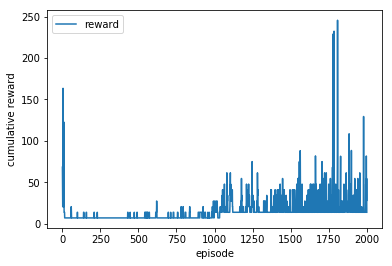

In [105]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['eps'], results['cum_sum'], label='reward')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()

In [106]:
# Final Performance 
print("Final Performance (Mean Reward over last 10 episodes): {}".format(np.sum(results['cum_sum'][-10:])/10))

Final Performance (Mean Reward over last 10 episodes): 30.64990962565983


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I opted for an easier takeoff task.The design of the reward function:

z_reward = np.tanh(1 - 0.003*(abs(self.sim.pose[2] - self.target_pos[2]))).sum()

xy_reward = np.tanh(1 - 0.009*(abs(self.sim.pose[:2] - self.target_pos[:2]))).sum()

reward = z_reward + xy_reward

z_reward is defined as how close we are to the target co-ordinate and xy_reward is used to penalise the movement of the quadcopter in x and y co-ordinates and Tanh function is used to scale the reward in range(-1,1).
   

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- Deep Deterministic Policy Gradients (DDPG) was used to design the agent as it suites well for the continuous control tasks and tweaked the hyperparameters a little

- Final Choice for hyperparameters were as follows:

exploration_mu = 0,
exploration_theta = 0.15,
exploration_sigma = 0.25,
buffer_size = 100000,
batch_size = 64,
gamma = 0.99,

- The agent uses neural net architecture for both actor and critic models as given below 

-Actor:

Dense(units=256) + BatchNorm + L2 Regularisation + ReLu Activation,
Dense(units=128) + BatchNorm + L2 Regularisation + ReLu Activation,
Dense(units=64) + BatchNorm + L2 Regularisation + ReLu Activation

-Critic:

--State Pathway:

Dense(units=256) + BatchNorm + L2 Regularisation + ReLu Activation,
Dense(units=128) + BatchNorm + L2 Regularisation + ReLu Activation
--Action Pathway:

Dense(units=256) + BatchNorm + L2 Regularisation + ReLu Activation,
Dense(units=128) + BatchNorm + L2 Regularisation + ReLu Activation

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- It was rather a diffuclt task to learn as nearly about in 1000 episodes there was not much change in the reward collection and as it explores the state space and learns about the enviroment ,nearabout after 1100 episodes it gradually started to collect high reward.

- It had a gradual learning curve including very much noise and after 1000 episodes ,it had more randomness over the reward noise.

- Final Performance (Mean Reward over last 10 episodes): 30.64990962565983

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- Getting started was the hardest part of the project as deasigning the agent and the reward fucntion .The tweaking of hyperparameters and the reward function was the most iterative part.

- The quadcopter started collecting more rewards suddenly after 1000 episodes and it increased the noise in reward collection .